# 二、如何构造极化码？

## 2.1 理论 v.s. 实践

极化码（*Polar Codes*）不是某一特定码的名称，而是**一类遵循相同理论与设计思想的码**。

**极化码的理论共性**：
- 基本性质：**线性码（Linear Codes）**
- 理论基础：**信道极化现象（Channel Polarization）**
- 设计策略：**冻结位（Frozen Bits）+信息位（Information Bits）**

**极化码的构造**：

极化码的最优性是理论上的，但在实际场景下，不论什么码，总存在错误概率。一般来讲，码长越长、码率越低的极化码纠错能力越强，但过长的码长会带来巨大的计算复杂度，而过低的码率则会带来较差的信息承载能力。因此，在使用前，应当依据具体应用需求，权衡冻结位和信息位的选取，从而获得一个可用的极化码。

---

## 2.2 构造算法

**目的**：确定各个极化信道的可靠度。

**已有方案**：
1. Monte Carlo 法：通过大量仿真，估计各极化信道的判决错误率；
2. 密度演化算法（Density Evolution）：基于LDPC的阈值分析理论，分析极化码各比特位的判决错误率；
3. 高斯近似（Gaussian Approximation）：对密度演化中的消息分布进行高斯建模，简化计算；
4. 信道退化（Channel Degradation）：构造退化信道序列估计可靠度；
5. 一些启发式算法，如极化权重算法（Polarization Weight）、遗传算法等，兼顾性能与复杂度。

从初学者的角度考虑，**BEC构造法**是不错的入手点，因为它具有如下特点：
- 理论依据直观；
- 编程实现简单；
- 在基础场景下具备良好性能。

我们考虑下面这样一个比特翻转信道

In [1]:
import plcoding
# 比特翻转概率
flip_prob = 0.11
# 信道容量=1-噪声熵
channel_cap = 1 - plcoding.h2_of(flip_prob)
print(f"信道容量{channel_cap:.2f}[bit]")

信道容量0.50[bit]


我们使用BEC构造法，构造出一系列不同码率的极化码，然后测试它们的译码错误率：

  0%|          | 0/1000 [00:00<?, ?it/s]

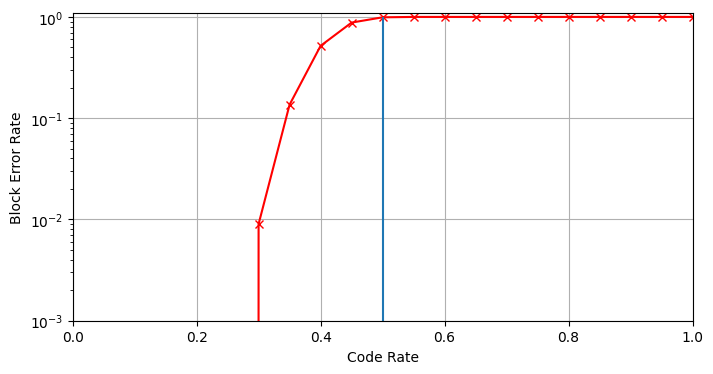

In [2]:
%run ./codes/bler_rate.py

通过上图可以大概明白极化码为什么需要构造、以及合适的参数一般是多少。

在建立了直观印象之后，接下来，我们关注**BEC构造法的具体实现**：

给定一个实数$e \in (0, 1)$，我们根据它计算得到两个新的值$e^2$和$2e - e^2$，也即：  
$(e) \to (e^2, 2e - e^2)$  
然后我们分别对这两个新的值，继续执行上述操作。也即若记$\alpha = e^2, \beta = 2e - e^2$，那么：  
$(\alpha, \beta) \to (\alpha^2, 2\alpha - \alpha^2,\beta^2,  2\beta - \beta^2)$  
依照上述过程，对码长为$N=2^n$的极化码而言，应当重复$n$次。

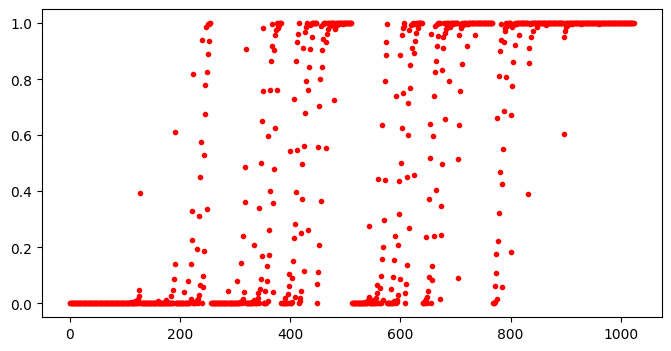

In [3]:
# 初始化几个关键值
e, n = 0.5, 10
# 迭代执行上述过程
old_list = [e]
for _ in range(n):
    new_list = []
    for element in old_list:
        a = element ** 2
        b = 2 * element - element ** 2
        new_list.extend([a, b])
    old_list = new_list
# 简单绘制一下
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(old_list, 'r.')
plt.show()